# 
# <center> ADAPTING  SOCIOECONOMIC INDICATORS AND IDENTIFYING INTRA-URBAN TYPOLOGIES IN SANTARÉM - PA </center>

<br/>

<div style="text-align: center;font-size: 90%;">
    Bruno Dias dos Santos, Silvana Amaral, Carolina Moutinho Duque de Pinho and Antonio Paez 
    <br/><br/>
    National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    e-mail to: <div><a href="mailto:bruno.santos@inpe.br">bruno.santos@inpe.br</a></div>
    <br/><br/>
</div>
<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> The Brazilian Institute of Geography and Statistics (IBGE) identified Intraurban Typologies in several Brazilian urban concentrations using microdata from the 2010 Census. However, using weighting areas as a spatial unit of analysis and the indicators adopted makes it challenging to replicate the methodology for other areas. This paper aims to adapt the IBGE study to the reality of an Amazonian city, choosing Santarém as study site. To achieve this objective, we adapted the socioeconomic indicators to the Amazonian context. As a result, we identified  six intra-urban typologies through an unsupervised classification, which differ concerning  population profile, housing conditions and location in the study area.
    
Key words — Intra-urban Typologies, Socioeconomic Indicators, Unsupervised Classification, Brazilian Amazon.

</div>    

<br/>

Importing libraries:

In [7]:
import geopandas as gpd                                   
import matplotlib.pyplot as plt                          
import numpy as np                                        
import pandas as pd                                       
from sklearn.preprocessing import StandardScaler         
from sklearn.cluster import AgglomerativeClustering       
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from tobler.area_weighted import area_interpolate

Entering data:

In [8]:
census_tracks = gpd.read_file("census_track_santarem.shp")

In [9]:
cell_grid = gpd.read_file("cell_grid.shp")

In [12]:
census_tracks

,ID,B_V001,B_V002,D01_V002,D01_V015,D01_V019,D01_V020,D01_V021,D01_V022,D01_V023,...,P13_V128,P13_V129,P13_V130,P13_V131,P13_V132,P13_V133,P13_V134,P12_V002,P11_V002,geometry
0,15439,143.0,629.0,143.0,59,2,55,0,2,4,...,0,0,0,0,0,0,0,300,329,"POLYGON ((749419.726 9731052.060, 749420.834 9..."
1,15440,NaN,NaN,NaN,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((750388.119 9724878.969, 750002.098 9..."
2,15441,245.0,932.0,245.0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,509,423,"POLYGON ((755434.803 9730608.652, 755450.179 9..."
3,15442,203.0,889.0,203.0,1,177,4,1,0,5,...,1,0,0,0,0,0,0,474,415,"POLYGON ((751127.287 9731415.712, 751132.813 9..."
4,15443,225.0,939.0,225.0,134,117,5,0,3,0,...,0,0,0,0,0,0,0,499,440,"POLYGON ((755003.347 9728790.701, 755072.916 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,15598,NaN,NaN,NaN,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((751641.038 9727369.088, 751653.235 9..."
256,15599,20.0,70.0,20.0,4,1,2,0,0,0,...,0,0,0,0,0,0,0,34,36,"POLYGON ((755103.881 9725005.347, 755051.200 9..."
257,15600,189.0,729.0,189.0,4,171,0,0,9,3,...,0,0,0,0,0,0,0,383,346,"POLYGON ((750476.728 9729407.681, 750506.563 9..."
258,15601,150.0,667.0,150.0,17,2,71,0,11,2,...,0,0,0,0,0,0,0,338,329,"POLYGON ((757595.240 9725868.032, 757726.957 9..."


#### Caption:
Variable starting with "B" = Datasheet  "Basic", 
Variable starting with "D01" = Datasheet " Domicílio01", 
Variable starting with "DR" = Datasheet "DomicílioRenda", 
Variable starting with "P01" = Datasheet "Pessoa01", 
Variable starting with "P11" = Datasheet "Pessoa11",
Variable starting with "P12" = Datasheet "Pessoa12",
Variable starting with "P13" = Datasheet "Pessoa13". 

The numbers of the variables have the same pattern as <a href=" https://www.ipea.gov.br/redeipea/images/pdfs/base_de_informacoess_por_setor_censitario_universo_censo_2010.pdf >">IBGE</a>.



In [13]:
cell_grid

,ID,geometry
0,5,"POLYGON ((752688.911 9722816.546, 752689.345 9..."
1,6,"POLYGON ((752789.095 9722816.113, 752789.529 9..."
2,10,"POLYGON ((753189.831 9722814.381, 753190.263 9..."
3,11,"POLYGON ((753290.015 9722813.949, 753290.447 9..."
4,12,"POLYGON ((753390.199 9722813.517, 753390.631 9..."
...,...,...
6296,14338,"POLYGON ((751430.790 9733012.497, 751431.221 9..."
6297,14339,"POLYGON ((751530.947 9733012.067, 751531.377 9..."
6298,14340,"POLYGON ((751631.104 9733011.636, 751631.534 9..."
6299,14392,"POLYGON ((751230.907 9733113.276, 751231.338 9..."


Setting the census tract base for the Tobler interpolation:

In [14]:
census_tracks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID        260 non-null    int64   
 1   B_V001    254 non-null    float64 
 2   B_V002    254 non-null    float64 
 3   D01_V002  255 non-null    float64 
 4   D01_V015  255 non-null    object  
 5   D01_V019  255 non-null    object  
 6   D01_V020  255 non-null    object  
 7   D01_V021  255 non-null    object  
 8   D01_V022  255 non-null    object  
 9   D01_V023  255 non-null    object  
 10  D01_V039  255 non-null    object  
 11  D01_V040  255 non-null    object  
 12  D01_V041  255 non-null    object  
 13  D01_V042  255 non-null    object  
 14  DR_V002   255 non-null    object  
 15  P01_V078  255 non-null    object  
 16  P13_V001  255 non-null    float64 
 17  P13_V022  255 non-null    object  
 18  P13_V036  255 non-null    object  
 19  P13_V037  255 non-null    object  
 20  P1

In [17]:
dummy = 0

census_tracks.iloc[:,1:-1] = census_tracks.iloc[:,1:-1].fillna(dummy) #Filling in missing values
census_tracks.iloc[:,1:-1] = census_tracks.iloc[:,1:-1].replace('X',0) #Replacing possible 'X' values with zero  
census_tracks.iloc[:,1:-1] = census_tracks.iloc[:,1:-1].astype(str).astype(float).astype(int) #Transforming the fields to integer values

In [18]:
census_tracks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID        260 non-null    int64   
 1   B_V001    260 non-null    int32   
 2   B_V002    260 non-null    int32   
 3   D01_V002  260 non-null    int32   
 4   D01_V015  260 non-null    int32   
 5   D01_V019  260 non-null    int32   
 6   D01_V020  260 non-null    int32   
 7   D01_V021  260 non-null    int32   
 8   D01_V022  260 non-null    int32   
 9   D01_V023  260 non-null    int32   
 10  D01_V039  260 non-null    int32   
 11  D01_V040  260 non-null    int32   
 12  D01_V041  260 non-null    int32   
 13  D01_V042  260 non-null    int32   
 14  DR_V002   260 non-null    int32   
 15  P01_V078  260 non-null    int32   
 16  P13_V001  260 non-null    int32   
 17  P13_V022  260 non-null    int32   
 18  P13_V036  260 non-null    int32   
 19  P13_V037  260 non-null    int32   
 20  P1

Tobler inteporlation to transfer the information from the census tracts to the cell grid:

In [22]:
interpolate =  cell_grid

for coluna in census_tracks.iloc[:,1:-1]:
    ct_area_interp_gdf = area_interpolate(source_df=census_tracks, 
                                          target_df=cell_grid,
                                          extensive_variables=[coluna])
    
    interpolate[coluna] = ct_area_interp_gdf[coluna]

Visualizing the interpolated grid:

In [24]:
interpolate

,ID,geometry,B_V001,B_V002,D01_V002,D01_V015,D01_V019,D01_V020,D01_V021,D01_V022,...,P13_V127,P13_V128,P13_V129,P13_V130,P13_V131,P13_V132,P13_V133,P13_V134,P12_V002,P11_V002
0,5,"POLYGON ((752688.911 9722816.546, 752689.345 9...",1.136187,3.166819,1.136187,1.015316,0.048348,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.450452,1.716368
1,6,"POLYGON ((752789.095 9722816.113, 752789.529 9...",1.136835,3.168625,1.136835,1.015895,0.048376,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.451278,1.717346
2,10,"POLYGON ((753189.831 9722814.381, 753190.263 9...",1.139489,3.176022,1.139489,1.018267,0.048489,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.454667,1.721356
3,11,"POLYGON ((753290.015 9722813.949, 753290.447 9...",1.140168,3.177916,1.140168,1.018874,0.048518,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.455534,1.722382
4,12,"POLYGON ((753390.199 9722813.517, 753390.631 9...",1.140854,3.179827,1.140854,1.019487,0.048547,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.456409,1.723418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6296,14338,"POLYGON ((751430.790 9733012.497, 751431.221 9...",4.047503,17.302302,4.047503,3.429563,3.831224,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.030897,0.0,0.0,0.030897,7.878727,9.423575
6297,14339,"POLYGON ((751530.947 9733012.067, 751531.377 9...",4.047508,17.302324,4.047508,3.429568,3.831229,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.030897,0.0,0.0,0.030897,7.878737,9.423587
6298,14340,"POLYGON ((751631.104 9733011.636, 751631.534 9...",4.047513,17.302345,4.047513,3.429572,3.831234,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.030897,0.0,0.0,0.030897,7.878747,9.423599
6299,14392,"POLYGON ((751230.907 9733113.276, 751231.338 9...",4.047493,17.302260,4.047493,3.429555,3.831215,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.030897,0.0,0.0,0.030897,7.878708,9.423552


In [26]:
interpolate.columns

Index(['ID', 'geometry', 'B_V001', 'B_V002', 'D01_V002', 'D01_V015',
       'D01_V019', 'D01_V020', 'D01_V021', 'D01_V022', 'D01_V023', 'D01_V039',
       'D01_V040', 'D01_V041', 'D01_V042', 'DR_V002', 'P01_V078', 'P13_V001',
       'P13_V022', 'P13_V036', 'P13_V037', 'P13_V038', 'P13_V039', 'P13_V040',
       'P13_V041', 'P13_V042', 'P13_V043', 'P13_V044', 'P13_V045', 'P13_V046',
       'P13_V047', 'P13_V048', 'P13_V099', 'P13_V100', 'P13_V101', 'P13_V102',
       'P13_V103', 'P13_V104', 'P13_V105', 'P13_V106', 'P13_V107', 'P13_V108',
       'P13_V109', 'P13_V110', 'P13_V111', 'P13_V112', 'P13_V113', 'P13_V114',
       'P13_V115', 'P13_V116', 'P13_V117', 'P13_V118', 'P13_V119', 'P13_V120',
       'P13_V121', 'P13_V122', 'P13_V123', 'P13_V124', 'P13_V125', 'P13_V126',
       'P13_V127', 'P13_V128', 'P13_V129', 'P13_V130', 'P13_V131', 'P13_V132',
       'P13_V133', 'P13_V134', 'P12_V002', 'P11_V002'],
      dtype='object')

### Creating the socioeconomic indicators:

Percentage of households with inadequate sewage disposal:

In [27]:
interpolate['inad_sewag'] = (interpolate[['D01_V019', 'D01_V020', 'D01_V021', 'D01_V022', 'D01_V023']].sum(axis=1))/(interpolate['B_V001']+0.01)

Percentage of households with inadequate water supply:

In [28]:
interpolate['inad_water'] = (interpolate['D01_V015'])/(interpolate['B_V001']+0.01)

Percentage of households with adequate garbage disposal:

In [29]:
interpolate['inap_waste'] = (interpolate[['D01_V039','D01_V040', 'D01_V041', 'D01_V042']].sum(axis=1))/(interpolate['B_V001']+0.01)

Total people per household:

In [30]:
interpolate['p_per_hous'] = interpolate['B_V002']/(interpolate['B_V001']+0.01)

Average monthly income of private households:

In [31]:
interpolate['avg_inv_hou'] = interpolate['DR_V002']/(interpolate['B_V001']+0.01)

Young Dependency Ratio:

In [35]:
interpolate['dr_15'] = (interpolate[['P13_V022', 'P13_V036', 'P13_V037', 'P13_V038', 'P13_V039', 'P13_V040',
       'P13_V041', 'P13_V042', 'P13_V043', 'P13_V044', 'P13_V045', 'P13_V046',
       'P13_V047', 'P13_V048']].sum(axis=1))/(interpolate['P13_V001']+0.01)

Old Dependency Ratio:

In [36]:
interpolate['dr_65'] = (interpolate[['P13_V099', 'P13_V100', 'P13_V101', 'P13_V102',
       'P13_V103', 'P13_V104', 'P13_V105', 'P13_V106', 'P13_V107', 'P13_V108',
       'P13_V109', 'P13_V110', 'P13_V111', 'P13_V112', 'P13_V113', 'P13_V114',
       'P13_V115', 'P13_V116', 'P13_V117', 'P13_V118', 'P13_V119', 'P13_V120',
       'P13_V121', 'P13_V122', 'P13_V123', 'P13_V124', 'P13_V125', 'P13_V126',
       'P13_V127', 'P13_V128', 'P13_V129', 'P13_V130', 'P13_V131', 'P13_V132',
       'P13_V133', 'P13_V134']].sum(axis=1))/(interpolate['P13_V001']+0.01)

Sex Ratio:

In [37]:
interpolate['sex_ratio'] = interpolate['P11_V002']/(interpolate['P12_V002']+0.01)

Household heads who are over 10 years old and literate:

In [38]:
interpolate['literacy'] = interpolate['P01_V078']/(interpolate['B_V001']+0.01)

In [40]:
interpolate.iloc[:,-9:]

,inad_sewag,inad_water,inap_waste,p_per_hous,avg_inv_hou,dr_15,dr_65,sex_ratio,literacy
0,0.042182,0.885821,0.000000,2.762917,5300.708221,0.241667,0.000000,1.175231,1.012366
1,0.042182,0.885825,0.000000,2.762930,5300.734571,0.241667,0.000000,1.175235,1.012371
2,0.042183,0.885843,0.000000,2.762986,5300.842229,0.241669,0.000000,1.175254,1.012392
3,0.042183,0.885848,0.000000,2.763001,5300.869710,0.241670,0.000000,1.175259,1.012397
4,0.042183,0.885852,0.000000,2.763015,5300.897412,0.241670,0.000000,1.175264,1.012403
...,...,...,...,...,...,...,...,...,...
6296,0.974691,0.845240,0.076148,4.264274,664.678417,0.323028,0.087449,1.194562,0.852855
6297,0.974691,0.845240,0.076148,4.264274,664.678419,0.323028,0.087449,1.194562,0.852855
6298,0.974691,0.845240,0.076148,4.264274,664.678421,0.323028,0.087449,1.194562,0.852855
6299,0.974691,0.845240,0.076148,4.264274,664.678413,0.323028,0.087449,1.194562,0.852855


In [42]:
interpolate.iloc[:,-9:].columns

Index(['inad_sewag', 'inad_water', 'inap_waste', 'p_per_hous', 'avg_inv_hou',
       'dr_15', 'dr_65', 'sex_ratio', 'literacy'],
      dtype='object')

Selecting the socioeconomic indicators: 

In [43]:
indicators = interpolate[['ID','geometry','avg_inv_hou', 'p_per_hous', 'dr_15', 'dr_65', 'sex_ratio', 'literacy',
       'inad_sewag', 'inad_water', 'inap_waste']]

In [44]:
indicators

,ID,geometry,avg_inv_hou,p_per_hous,dr_15,dr_65,sex_ratio,literacy,inad_sewag,inad_water,inap_waste
0,5,"POLYGON ((752688.911 9722816.546, 752689.345 9...",5300.708221,2.762917,0.241667,0.000000,1.175231,1.012366,0.042182,0.885821,0.000000
1,6,"POLYGON ((752789.095 9722816.113, 752789.529 9...",5300.734571,2.762930,0.241667,0.000000,1.175235,1.012371,0.042182,0.885825,0.000000
2,10,"POLYGON ((753189.831 9722814.381, 753190.263 9...",5300.842229,2.762986,0.241669,0.000000,1.175254,1.012392,0.042183,0.885843,0.000000
3,11,"POLYGON ((753290.015 9722813.949, 753290.447 9...",5300.869710,2.763001,0.241670,0.000000,1.175259,1.012397,0.042183,0.885848,0.000000
4,12,"POLYGON ((753390.199 9722813.517, 753390.631 9...",5300.897412,2.763015,0.241670,0.000000,1.175264,1.012403,0.042183,0.885852,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
6296,14338,"POLYGON ((751430.790 9733012.497, 751431.221 9...",664.678417,4.264274,0.323028,0.087449,1.194562,0.852855,0.974691,0.845240,0.076148
6297,14339,"POLYGON ((751530.947 9733012.067, 751531.377 9...",664.678419,4.264274,0.323028,0.087449,1.194562,0.852855,0.974691,0.845240,0.076148
6298,14340,"POLYGON ((751631.104 9733011.636, 751631.534 9...",664.678421,4.264274,0.323028,0.087449,1.194562,0.852855,0.974691,0.845240,0.076148
6299,14392,"POLYGON ((751230.907 9733113.276, 751231.338 9...",664.678413,4.264274,0.323028,0.087449,1.194562,0.852855,0.974691,0.845240,0.076148


### Unsupervised classification:

Preparing the indicator database for the unsupervised classification:

In [45]:
scaler = StandardScaler()
indicators.iloc[:,2:] = scaler.fit_transform(indicators.iloc[:,2:])
indicators

C:\Users\brdia\AppData\Local\Temp\ipykernel_2628\3384020647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indicators.iloc[:,2:] = scaler.fit_transform(indicators.iloc[:,2:])


,ID,geometry,avg_inv_hou,p_per_hous,dr_15,dr_65,sex_ratio,literacy,inad_sewag,inad_water,inap_waste
0,5,"POLYGON ((752688.911 9722816.546, 752689.345 9...",4.410572,-2.005001,-0.630414,-2.212782,1.294842,0.912436,-1.586697,3.868941,-0.657175
1,6,"POLYGON ((752789.095 9722816.113, 752789.529 9...",4.410601,-2.004980,-0.630408,-2.212782,1.294868,0.912469,-1.586696,3.868964,-0.657175
2,10,"POLYGON ((753189.831 9722814.381, 753190.263 9...",4.410723,-2.004895,-0.630384,-2.212782,1.294975,0.912602,-1.586694,3.869060,-0.657175
3,11,"POLYGON ((753290.015 9722813.949, 753290.447 9...",4.410754,-2.004873,-0.630378,-2.212782,1.295002,0.912635,-1.586693,3.869085,-0.657175
4,12,"POLYGON ((753390.199 9722813.517, 753390.631 9...",4.410785,-2.004852,-0.630372,-2.212782,1.295030,0.912670,-1.586693,3.869109,-0.657175
...,...,...,...,...,...,...,...,...,...,...,...
6296,14338,"POLYGON ((751430.790 9733012.497, 751431.221 9...",-0.826077,0.264537,0.489679,1.809134,1.405008,-0.118153,1.059443,3.652556,1.775416
6297,14339,"POLYGON ((751530.947 9733012.067, 751531.377 9...",-0.826077,0.264537,0.489679,1.809134,1.405008,-0.118153,1.059443,3.652556,1.775416
6298,14340,"POLYGON ((751631.104 9733011.636, 751631.534 9...",-0.826077,0.264537,0.489679,1.809134,1.405008,-0.118153,1.059443,3.652556,1.775416
6299,14392,"POLYGON ((751230.907 9733113.276, 751231.338 9...",-0.826077,0.264537,0.489679,1.809134,1.405008,-0.118153,1.059443,3.652556,1.775416


In [46]:
indicators.iloc[:,2:]

,avg_inv_hou,p_per_hous,dr_15,dr_65,sex_ratio,literacy,inad_sewag,inad_water,inap_waste
0,4.410572,-2.005001,-0.630414,-2.212782,1.294842,0.912436,-1.586697,3.868941,-0.657175
1,4.410601,-2.004980,-0.630408,-2.212782,1.294868,0.912469,-1.586696,3.868964,-0.657175
2,4.410723,-2.004895,-0.630384,-2.212782,1.294975,0.912602,-1.586694,3.869060,-0.657175
3,4.410754,-2.004873,-0.630378,-2.212782,1.295002,0.912635,-1.586693,3.869085,-0.657175
4,4.410785,-2.004852,-0.630372,-2.212782,1.295030,0.912670,-1.586693,3.869109,-0.657175
...,...,...,...,...,...,...,...,...,...
6296,-0.826077,0.264537,0.489679,1.809134,1.405008,-0.118153,1.059443,3.652556,1.775416
6297,-0.826077,0.264537,0.489679,1.809134,1.405008,-0.118153,1.059443,3.652556,1.775416
6298,-0.826077,0.264537,0.489679,1.809134,1.405008,-0.118153,1.059443,3.652556,1.775416
6299,-0.826077,0.264537,0.489679,1.809134,1.405008,-0.118153,1.059443,3.652556,1.775416


Viewing the correlation (Pearson's) between the indicators: 

In [48]:
corr_df = indicators.corr()

corr_df.style.background_gradient(cmap='Spectral')

,ID,avg_inv_hou,p_per_hous,dr_15,dr_65,sex_ratio,literacy,inad_sewag,inad_water,inap_waste
ID,1.000000,0.449439,0.086115,-0.248463,0.452316,-0.018078,0.308552,-0.257422,-0.197085,-0.286005
avg_inv_hou,0.449439,1.000000,-0.108459,-0.415736,0.535894,-0.077620,0.501815,-0.344410,-0.198403,-0.254113
p_per_hous,0.086115,-0.108459,1.000000,0.733157,0.068064,0.739814,0.566587,0.379971,0.145805,0.174004
dr_15,-0.248463,-0.415736,0.733157,1.000000,-0.261385,0.761695,0.349957,0.551213,0.362248,0.375538
dr_65,0.452316,0.535894,0.068064,-0.261385,1.000000,0.104765,0.404404,-0.151926,-0.285938,-0.145153
sex_ratio,-0.018078,-0.077620,0.739814,0.761695,0.104765,1.000000,0.593202,0.424563,0.274155,0.244247
literacy,0.308552,0.501815,0.566587,0.349957,0.404404,0.593202,1.000000,0.033822,0.067130,-0.105843
inad_sewag,-0.257422,-0.344410,0.379971,0.551213,-0.151926,0.424563,0.033822,1.000000,0.186151,0.371478
inad_water,-0.197085,-0.198403,0.145805,0.362248,-0.285938,0.274155,0.067130,0.186151,1.000000,0.256069
inap_waste,-0.286005,-0.254113,0.174004,0.375538,-0.145153,0.244247,-0.105843,0.371478,0.256069,1.000000


Transforming the data into a numpy array:

In [50]:
dados = indicators.iloc[:,2:].to_numpy()
dados

array([[ 4.41057151, -2.0050007 , -0.63041425, ..., -1.58669694,
         3.86894074, -0.65717545],
       [ 4.41060128, -2.00497994, -0.63040833, ..., -1.58669635,
         3.86896422, -0.65717545],
       [ 4.41072288, -2.00489511, -0.63038413, ..., -1.58669392,
         3.86906015, -0.65717545],
       ...,
       [-0.82607733,  0.26453745,  0.48967907, ...,  1.0594432 ,
         3.65255625,  1.77541606],
       [-0.82607734,  0.26453737,  0.48967906, ...,  1.05944316,
         3.65255619,  1.77541603],
       [-0.82607734,  0.26453739,  0.48967906, ...,  1.05944317,
         3.65255621,  1.77541604]])

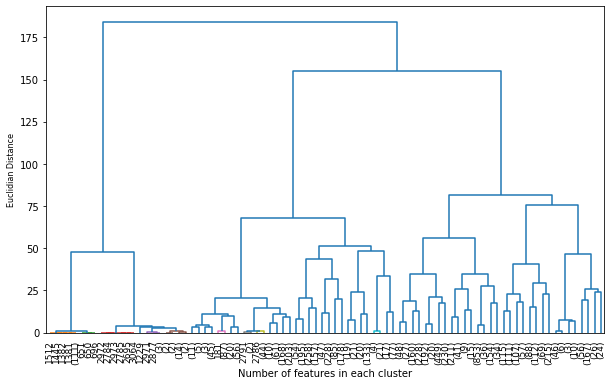

In [51]:
fig, axes = plt.subplots(1, 1, figsize=(10,6))

fig.set_facecolor('white')
dendrograma = dendrogram(linkage(dados, method='ward'), ax=axes, p = 6, truncate_mode = 'level', color_threshold = 0.9)
plt.xlabel('Number of features in each cluster', fontsize = 10)
plt.ylabel('Euclidian Distance', fontsize = 8);
plt.xticks(fontsize=9, rotation=90)
plt.show()

Unsupervised classification with a hierarchical clustering algorithm (setting 6 as the number of clusters):

In [52]:
ag_model = AgglomerativeClustering(n_clusters = 6, linkage='ward', affinity='euclidean')
ag_model.fit(dados)

AgglomerativeClustering(n_clusters=6)

Counting features per cluster:

In [54]:
unique, counts = np.unique(ag_model.labels_, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[   0 2707]
 [   1 1514]
 [   2  338]
 [   3  150]
 [   4  874]
 [   5  718]]


Including the classification result in the indicator database:

In [55]:
indicators['Clusters_6'] = ag_model.labels_

C:\Users\brdia\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Displaying a simple classification map:

<AxesSubplot:>

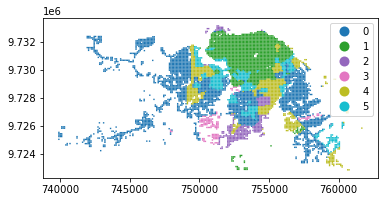

In [56]:
indicators.plot(column= indicators['Clusters_6'], legend=True, categorical=True)

Building bloxpost to assist in cluster characterization:

In [58]:
indicators.iloc[:,2:-1]

,avg_inv_hou,p_per_hous,dr_15,dr_65,sex_ratio,literacy,inad_sewag,inad_water,inap_waste
0,4.410572,-2.005001,-0.630414,-2.212782,1.294842,0.912436,-1.586697,3.868941,-0.657175
1,4.410601,-2.004980,-0.630408,-2.212782,1.294868,0.912469,-1.586696,3.868964,-0.657175
2,4.410723,-2.004895,-0.630384,-2.212782,1.294975,0.912602,-1.586694,3.869060,-0.657175
3,4.410754,-2.004873,-0.630378,-2.212782,1.295002,0.912635,-1.586693,3.869085,-0.657175
4,4.410785,-2.004852,-0.630372,-2.212782,1.295030,0.912670,-1.586693,3.869109,-0.657175
...,...,...,...,...,...,...,...,...,...
6296,-0.826077,0.264537,0.489679,1.809134,1.405008,-0.118153,1.059443,3.652556,1.775416
6297,-0.826077,0.264537,0.489679,1.809134,1.405008,-0.118153,1.059443,3.652556,1.775416
6298,-0.826077,0.264537,0.489679,1.809134,1.405008,-0.118153,1.059443,3.652556,1.775416
6299,-0.826077,0.264537,0.489679,1.809134,1.405008,-0.118153,1.059443,3.652556,1.775416


In [73]:
indicators.iloc[:,2:-1] = scaler.inverse_transform(indicators.iloc[:,2:-1])

C:\Users\brdia\AppData\Local\Temp\ipykernel_2628\3024765682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indicators.iloc[:,2:-1] = scaler.inverse_transform(indicators.iloc[:,2:-1])


In [74]:
indicators

,ID,geometry,avg_inv_hou,p_per_hous,dr_15,dr_65,sex_ratio,literacy,inad_sewag,inad_water,inap_waste,Clusters_6
0,5,"POLYGON ((752688.911 9722816.546, 752689.345 9...",4.694138e+06,5.917015,0.305013,0.048113,1.154242,1.027833,0.616205,0.326368,0.020572,1
1,6,"POLYGON ((752789.095 9722816.113, 752789.529 9...",4.694161e+06,5.917024,0.305013,0.048113,1.154243,1.027834,0.616205,0.326369,0.020572,1
2,10,"POLYGON ((753189.831 9722814.381, 753190.263 9...",4.694257e+06,5.917061,0.305013,0.048113,1.154246,1.027837,0.616205,0.326372,0.020572,1
3,11,"POLYGON ((753290.015 9722813.949, 753290.447 9...",4.694281e+06,5.917070,0.305013,0.048113,1.154247,1.027838,0.616205,0.326373,0.020572,1
4,12,"POLYGON ((753390.199 9722813.517, 753390.631 9...",4.694305e+06,5.917080,0.305013,0.048113,1.154248,1.027839,0.616205,0.326374,0.020572,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6296,14338,"POLYGON ((751430.790 9733012.497, 751431.221 9...",5.898389e+05,6.910200,0.310922,0.050014,1.157634,1.003145,0.944824,0.318757,0.022955,2
6297,14339,"POLYGON ((751530.947 9733012.067, 751531.377 9...",5.898389e+05,6.910200,0.310922,0.050014,1.157634,1.003145,0.944824,0.318757,0.022955,2
6298,14340,"POLYGON ((751631.104 9733011.636, 751631.534 9...",5.898389e+05,6.910200,0.310922,0.050014,1.157634,1.003145,0.944824,0.318757,0.022955,2
6299,14392,"POLYGON ((751230.907 9733113.276, 751231.338 9...",5.898389e+05,6.910200,0.310922,0.050014,1.157634,1.003145,0.944824,0.318757,0.022955,2


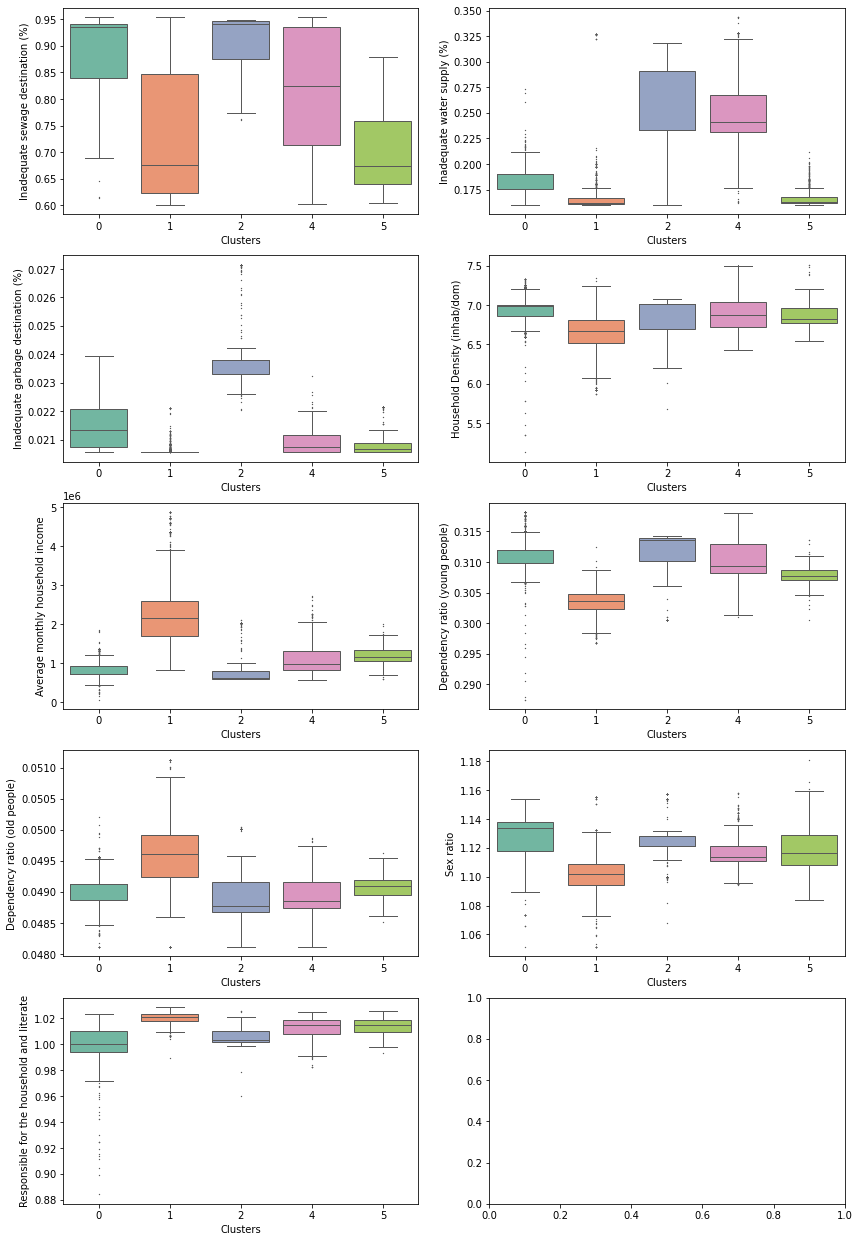

In [87]:
fig, axes = plt.subplots(5,2, figsize=(14, 22))

sns.boxplot(ax=axes[0,0], x='Clusters_6', y= indicators['inad_sewag'],  
            linewidth = 1,palette = 'Set2', fliersize = 0.5, data = indicators[(indicators.Clusters_6 != 3)]).set(ylabel='Inadequate sewage destination (%)', xlabel='Clusters')

sns.boxplot(ax=axes[0,1], x='Clusters_6', y= indicators['inad_water'],  
            linewidth = 1,palette = 'Set2', fliersize = 0.5, data = indicators[(indicators.Clusters_6 != 3)]).set(ylabel='Inadequate water supply (%)', xlabel='Clusters')

sns.boxplot(ax=axes[1,0],x='Clusters_6', y= indicators['inap_waste'],  
            linewidth = 1,palette = 'Set2', fliersize = 0.5, data = indicators[(indicators.Clusters_6 != 3)]).set(ylabel='Inadequate garbage destination (%)', xlabel='Clusters')

sns.boxplot(ax=axes[1,1], x='Clusters_6', y= indicators['p_per_hous'],
            linewidth = 1,palette = 'Set2', fliersize = 0.5, data = indicators[(indicators.Clusters_6 != 3)]).set(ylabel='Household Density (inhab/dom)', xlabel='Clusters')

sns.boxplot(ax=axes[2,0], x='Clusters_6', y= indicators['avg_inv_hou'], 
            linewidth = 1,palette = 'Set2', fliersize = 0.5, data = indicators[(indicators.Clusters_6 != 3)]).set(ylabel='Average monthly household income', xlabel='Clusters')

sns.boxplot(ax=axes[2,1], x='Clusters_6', y= indicators['dr_15'], linewidth = 1,palette = 'Set2', fliersize = 0.5, data = indicators[(indicators.Clusters_6 != 3)]).set(ylabel='Dependency ratio (young people)', xlabel='Clusters')

sns.boxplot(ax=axes[3,0], x='Clusters_6', y= indicators['dr_65'],  
            linewidth = 1,palette = 'Set2', fliersize = 0.5, data = indicators[(indicators.Clusters_6 != 3)]).set(ylabel='Dependency ratio (old people)', xlabel='Clusters')

sns.boxplot(ax=axes[3,1],x='Clusters_6', y= indicators['sex_ratio'], 
            linewidth = 1,palette = 'Set2', fliersize = 0.5, data = indicators[(indicators.Clusters_6 != 3)]).set(ylabel='Sex ratio', xlabel='Clusters')

sns.boxplot(ax=axes[4,0],x='Clusters_6', y= indicators['literacy'],
            linewidth = 1,palette = 'Set2', fliersize = 0.5, data = indicators[(indicators.Clusters_6 != 3)]).set(ylabel='Responsible for the household and literate', xlabel='Clusters')
plt.show()


Exporting the data:

In [88]:
indicators.to_file("clusters_socioeconomic.shp")

C:\Users\brdia\AppData\Local\Temp\ipykernel_2628\3158942499.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  indicators.to_file("clusters_socioeconomic.shp")
